## Observations and Insights 

Of the 4 most promising drugs, mice treated with Capomulin and Ramicane had significantly lower final tumor volumes than mice treated with Infubinol and Ceftamin. However, this does not necessarily mean that Capomulin and Ramicane were more effective than Infubinol and Ceftamin, as we did not analyze the start sizes of the tumors for each of the drugs.

In one instance, a mouse treated with Capomulin saw a significant reduction in tumor volume over the 45 days in which it was measured. 

In the sample of mice treated with Capomulin, weight of the mouse and volume of their tumors had a strong positive correlation, with an r-value of 0.88. This is another factor that could have skewed the analysis of the 4 most promising drugs. It is possible that mice that happened to weigh less were treated with Infubinol and Ceftamin, contributing to the overall smaller tumor volumes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./Mouse_metadata.csv"
study_results_path = "./Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
StudyData = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
StudyData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
Mice = StudyData["Mouse ID"].unique()
len(Mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
Grouped = StudyData.groupby(["Mouse ID","Timepoint"])
GroupedTable = Grouped.count()

DuplicateMouse = GroupedTable.loc[(GroupedTable["Sex"] >1),:]
DuplicateMouse

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
ReducedStudyData = StudyData.loc[(StudyData["Mouse ID"]!="g989"),:]
ReducedStudyData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
Mice = ReducedStudyData["Mouse ID"].unique()
len(Mice)

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group by regimen
RegimenGroups = ReducedStudyData.groupby(["Drug Regimen"])

# Find the mean tumor volume by regimen
MeanVolumes = RegimenGroups["Tumor Volume (mm3)"].mean()
MeanVolumes

# Create a data frame to hold the stats
RegimenStats = pd.DataFrame(MeanVolumes)
RegimenStats = RegimenStats.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})

# Add the median tumor volume
RegimenStats["Median Tumor Volume"] = RegimenGroups["Tumor Volume (mm3)"].median()

# Add the variance
RegimenStats["Tumor Volume Variance"] = RegimenGroups["Tumor Volume (mm3)"].var()

# Add the standard deviation
RegimenStats["Tumor Volume St Dev"] = RegimenGroups["Tumor Volume (mm3)"].std()

# Add the SEM
RegimenStats["Tumor Volume SEM"] = RegimenGroups["Tumor Volume (mm3)"].sem()
RegimenStats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

RegimenStats2 = RegimenGroups.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
RegimenStats2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Measurements per Regimen')

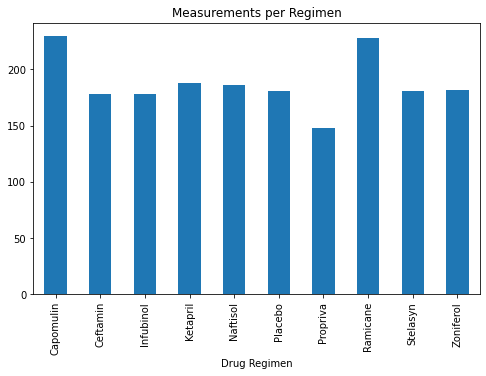

In [86]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
PandasPlot = ReducedStudyData[["Drug Regimen","Tumor Volume (mm3)"]]
PandasPlot = PandasPlot.groupby(["Drug Regimen"])
PandasPlot = PandasPlot["Tumor Volume (mm3)"].count()
PandasPlot
PandasPlot.plot(kind="bar",figsize=(8,5))
plt.title("Measurements per Regimen")


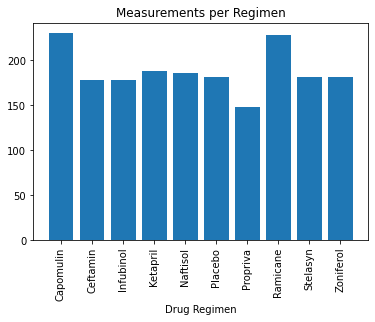

In [81]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
PyPlot = pd.DataFrame(PandasPlot)
PyPlot

Drugs = PyPlot.index.values.tolist()
Measurements = PyPlot["Tumor Volume (mm3)"].tolist()

plt.bar(Drugs,Measurements,align="center")
plt.title("Measurements per Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:title={'center':'Mice by Sex'}, ylabel='Sex'>

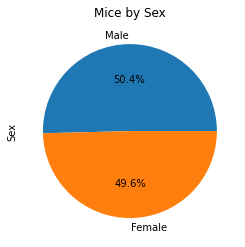

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
UniqueMice = ReducedStudyData.drop_duplicates(["Mouse ID"])
UniqueMice

SexCounts = UniqueMice["Sex"].value_counts()
SexCounts
SexCounts.plot(kind = "pie", title = "Mice by Sex",autopct="%1.1f%%")


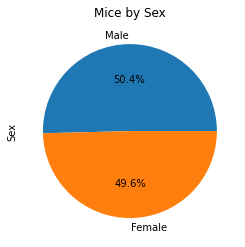

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(SexCounts,labels = ["Male","Female"],autopct="%1.1f%%")
plt.title("Mice by Sex")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

ReducedStudyData
FinalTumorData = ReducedStudyData[["Mouse ID","Drug Regimen","Timepoint","Weight (g)","Tumor Volume (mm3)"]]
LastTimepoint = FinalTumorData.drop_duplicates(subset=["Mouse ID"],keep="last")
LastTimepoint

,Mouse ID,Drug Regimen,Timepoint,Weight (g),Tumor Volume (mm3)
9,k403,Ramicane,45,16,22.050126
19,s185,Capomulin,45,17,23.343598
29,x401,Capomulin,45,15,28.484033
39,m601,Capomulin,45,17,28.430964
49,g791,Ramicane,45,16,29.128472
...,...,...,...,...,...
1859,z314,Stelasyn,5,28,45.934712
1862,z435,Propriva,10,26,48.710661
1872,z581,Infubinol,45,25,62.754451
1882,z795,Naftisol,45,29,65.741070


In [138]:
# Create a list for each treatment's final tumor volumes
Capomulin = LastTimepoint.loc[(LastTimepoint["Drug Regimen"] =="Capomulin"),:]
CapomulinVolumes = Capomulin["Tumor Volume (mm3)"].tolist()
# CapomulinVolumes

Ramicane = LastTimepoint.loc[(LastTimepoint["Drug Regimen"] =="Ramicane"),:]
RamicaneVolumes = Ramicane["Tumor Volume (mm3)"].tolist()
# RamicaneVolumes

Infubinol = LastTimepoint.loc[(LastTimepoint["Drug Regimen"] =="Infubinol"),:]
InfubinolVolumes = Infubinol["Tumor Volume (mm3)"].tolist()
# InfubinolVolumes

Ceftamin = LastTimepoint.loc[(LastTimepoint["Drug Regimen"] =="Ceftamin"),:]
CeftaminVolumes = Ceftamin["Tumor Volume (mm3)"].tolist()
# CeftaminVolumes

In [146]:
# Find the quartiles, IQR, and bounds of each treatment type's final tumor volumes
CapomulinQuartiles = Capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
CapomulinLowerQ = CapomulinQuartiles[0.25]
CapomulinUpperQ = CapomulinQuartiles[0.75]
CapomulinIQR = CapomulinUpperQ - CapomulinLowerQ
CapomulinLowerBound = CapomulinLowerQ - (1.5 * CapomulinIQR)
CapomulinUpperBound = CapomulinUpperQ + (1.5 * CapomulinIQR)

RamicaneQuartiles = Ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
RamicaneLowerQ = RamicaneQuartiles[0.25]
RamicaneUpperQ = RamicaneQuartiles[0.75]
RamicaneIQR = RamicaneUpperQ - RamicaneLowerQ
RamicaneLowerBound = RamicaneLowerQ - (1.5 * RamicaneIQR)
RamicaneUpperBound = RamicaneUpperQ + (1.5 * RamicaneIQR)

InfubinolQuartiles = Infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
InfubinolLowerQ = InfubinolQuartiles[0.25]
InfubinolUpperQ = InfubinolQuartiles[0.75]
InfubinolIQR = InfubinolUpperQ - InfubinolLowerQ
InfubinolLowerBound = InfubinolLowerQ - (1.5 * InfubinolIQR)
InfubinolUpperBound = InfubinolUpperQ + (1.5 * InfubinolIQR)

CeftaminQuartiles = Ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
CeftaminLowerQ = CeftaminQuartiles[0.25]
CeftaminUpperQ = CeftaminQuartiles[0.75]
CeftaminIQR = CeftaminUpperQ - CeftaminLowerQ
CeftaminLowerBound = CeftaminLowerQ - (1.5 * CeftaminIQR)
CeftaminUpperBound = CeftaminUpperQ + (1.5 * CeftaminIQR)

In [163]:
# Find the potential outliers
CapomulinOutliers = Capomulin.loc[(Capomulin["Tumor Volume (mm3)"] < CapomulinLowerBound) | (Capomulin["Tumor Volume (mm3)"] > CapomulinUpperBound)]
CapomulinOutliers = CapomulinOutliers["Tumor Volume (mm3)"].tolist()
CapomulinOutliers

RamicaneOutliers = Ramicane.loc[(Ramicane["Tumor Volume (mm3)"] < RamicaneLowerBound) | (Ramicane["Tumor Volume (mm3)"] > RamicaneUpperBound)]
RamicaneOutliers = RamicaneOutliers["Tumor Volume (mm3)"].tolist()
RamicaneOutliers

InfubinolOutliers = Infubinol.loc[(Infubinol["Tumor Volume (mm3)"] < InfubinolLowerBound) | (Infubinol["Tumor Volume (mm3)"] > InfubinolUpperBound)]
InfubinolOutliers = InfubinolOutliers["Tumor Volume (mm3)"].tolist()
InfubinolOutliers

CeftaminOutliers = Ceftamin.loc[(Ceftamin["Tumor Volume (mm3)"] < CeftaminLowerBound) | (Ceftamin["Tumor Volume (mm3)"] > CeftaminUpperBound)]
CeftaminOutliers = CeftaminOutliers["Tumor Volume (mm3)"].tolist()
CeftaminOutliers

[]

In [164]:
# Print the findings
print("Capomulin Treatment Final Tumor Volume Data")
print(f"Lower Bound: {CapomulinLowerBound}")
print(f"Upper Bound: {CapomulinUpperBound}")
print(f"Potential Outliers: {CapomulinOutliers}")

print("-------------------------------")

print("Ramicane Treatment Final Tumor Volume Data")
print(f"Lower Bound: {RamicaneLowerBound}")
print(f"Upper Bound: {RamicaneUpperBound}")
print(f"Potential Outliers: {RamicaneOutliers}")

print("-------------------------------")

print("Infubinol Treatment Final Tumor Volume Data")
print(f"Lower Bound: {InfubinolLowerBound}")
print(f"Upper Bound: {InfubinolUpperBound}")
print(f"Potential Outliers: {InfubinolOutliers}")

print("-------------------------------")

print("Ceftamin Treatment Final Tumor Volume Data")
print(f"Lower Bound: {CeftaminLowerBound}")
print(f"Upper Bound: {CeftaminUpperBound}")
print(f"Potential Outliers: {CeftaminOutliers}")

Capomulin Treatment Final Tumor Volume Data
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []
-------------------------------
Ramicane Treatment Final Tumor Volume Data
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []
-------------------------------
Infubinol Treatment Final Tumor Volume Data
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.321345799999996]
-------------------------------
Ceftamin Treatment Final Tumor Volume Data
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []


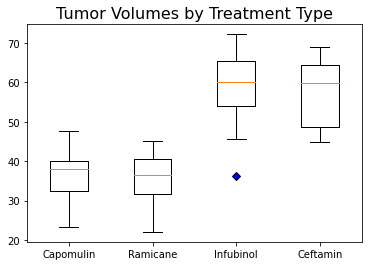

In [180]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
TreatmentData = [CapomulinVolumes, RamicaneVolumes, InfubinolVolumes, CeftaminVolumes]
Labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
BlueDiamond = dict(markerfacecolor = "b",marker="D")

fig,ax1 = plt.subplots()
ax1.set_title("Tumor Volumes by Treatment Type",fontsize=16)
ax1.boxplot(TreatmentData, labels = Labels,flierprops = BlueDiamond)
plt.show()

## Line and Scatter Plots

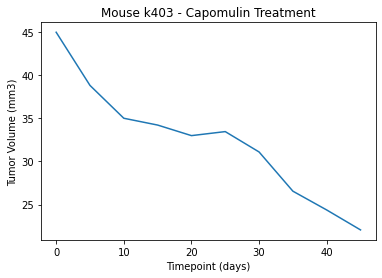

In [196]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
CapomulinMouse = ReducedStudyData.head(10)
CapomulinMouse

Timepoint = CapomulinMouse["Timepoint"].tolist()
Timepoint

Volume = CapomulinMouse["Tumor Volume (mm3)"].tolist()
Volume

plt.plot(Timepoint,Volume)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse k403 - Capomulin Treatment")
plt.show()

In [224]:
Capomulin

,Mouse ID,Drug Regimen,Timepoint,Weight (g),Tumor Volume (mm3)
19,s185,Capomulin,45,17,23.343598
29,x401,Capomulin,45,15,28.484033
39,m601,Capomulin,45,17,28.430964
64,f966,Capomulin,20,17,30.485985
104,u364,Capomulin,45,17,31.023923
124,y793,Capomulin,45,17,31.896238
134,r554,Capomulin,45,17,32.377357
144,m957,Capomulin,45,19,33.329098
164,t565,Capomulin,45,17,34.455298
204,i738,Capomulin,45,20,37.311846


In [226]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin
Weight = Capomulin.loc[:,"Weight (g)"]
Volume = Capomulin.loc[:,"Tumor Volume (mm3)"]

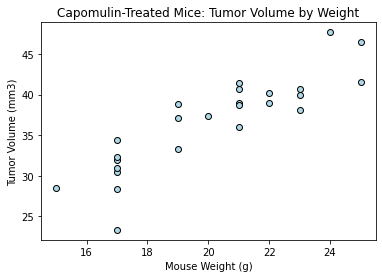

In [227]:
plt.scatter(Weight,Volume,marker="o",facecolors="lightblue",edgecolors="black")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin-Treated Mice: Tumor Volume by Weight")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for Capomulin-treated mice is 0.88.


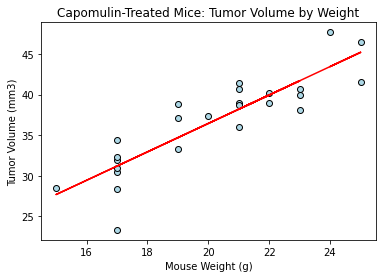

In [228]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

Correlation = st.pearsonr(Weight,Volume)
print(f"The correlation coefficient between mouse weight and average tumor volume for Capomulin-treated mice is {round(Correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(Weight,Volume)
regress_values = slope * Weight + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(Weight,Volume,marker="o",facecolors="lightblue",edgecolors="black")
plt.plot(Weight,regress_values,"r-")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin-Treated Mice: Tumor Volume by Weight")

plt.show()